In [1]:
import sys
import os
sys.path.append(os.path.join(".","nptools"))

#Jseq = "GCTCAGTGGTGTACGGTACAAACCAGTAGCTAGCATTATACCTAGGACTGAGCTAGCTGTCAGCTCCGGCTTGTCGACGACGGCGT"
#Pseq = "GCTCAGTGGTGTACGGTACAAACCAGTATCCACACATTATACGAGCCGGATGATTAAATTGAAACTCCGGCTTGTCGACGACGGCGT"

Jonly = "CTGACAGCTAGCTCAGTCCTAGGTATAATGCTAGC" #this one is on the "CC" plasmid
Ponly = "TTTCAATTTAATCATCCGGCTCGTATAATGTGTGGA" #this one is on the "PA" plasmid
bc0 = "AGTAGCACTAGGCAATTTGTTCCGTATTGAAGAGACAGC" #I accidentally put this one on both plasmids, then changed to below
bc1 = "ACCAATGGAGCAGGAATAGTTACTCATCAGCTGGTGAG" #this one is usually associated with the "CC" plasmid
bc2 = "CTAGTTAGATGATAAACTAGTTGCTTGGAACGAACCGG" #this one is associated with the "PA" plasmid
beginner =     "CAAGCCCATTATTACCCTGTTATCCCTAGACACCAATCAGAGGCCACA"#"TCGACGACGGCGTG")
attBsiteU21R = "CCCAGCAGGTATGATCCTGACGACGGAGCACGCCGTCGTCGACAAGCC"#"AGTTCGTAGACGGA")
attBsiteU22R = "TTTGTTAGGTATGATCCTGACGACGGAGCACGCCGTCGTCGACAAGCC"
attBnoU = "AGGTATGATCCTGACGACGGAGCACGCCGTCGTCGACAAGCC"
U21primerend = "GTACAAACCAGTAGCTAGCATTATACCTAGGACTGAGCTAGCTGTCAGCTCCGGCTTGTC"+\
                "GACGACGGCGTGCTCCGTCGTCAGGATCATACCTGCTGGGAGTTCGTAGACGGA"

U22primerend = "GCTCAGTGGTGTACGGTACAAACCAGTATCCACACATTATACGAGCCGGATGATTAAAT"+\
                "TGAAACTCCGGCTTGTCGACGACGGCGTGCTCCGTCGTCAGGATCATACCTAACAAACGCAGAATCCAAGC"


barcodes = {
    "BC01":"AAGAAAGTTGTCGGTGTCTTTGT",
    "BC02":"TCGATTCCGTTTGTAGTCGTCTG",
    "BC03":"GAGTCTTGTGTCCCAGTTACCAG",
    "BC04":"TTCGGATTCTATCGTGTTTCCCT",
    "BC05":"CTTGTCCAGGGTTTGTGTAACCT",
    "BC06":"TTCTCGCAAAGGCAGAAAGTAGT",
    "BC07":"GTGTTACCGTGGGAATGAATCCT",
    "BC08":"TTCAGGGAACAAACCAAGTTACG",
    "BC09":"AACTAGGCACAGCGAGTCTTGGT",
    "BC10":"AAGCGTTGAAACCTTTGTCCTCT",
    "BC11":"GTTTCATCTATCGGAGGGAATGG",
    "BC12":"CAGGTAGAAAGAAGCAGAATCGG",
    "BC13":"AGAACGACTTCCATACTCGTGTG",
    "BC14":"AACGAGTCTCTTGGGACCCATAG",
    "BC15":"AGGTCTACCTCGCTAACACCACT"
    }
from nanopore_scripts import *
npbc_justseqs = []
npbc_justseqs_rc = []
for bc in barcodes:
    npbc_justseqs+=[barcodes[bc]]
    npbc_justseqs_rc+=[rc(barcodes[bc])]
    barcodes[bc]= (barcodes[bc],rc(barcodes[bc]))
npbc_justseqs += npbc_justseqs_rc
print("done")

done


In [2]:
import glob
fastqdirectory = os.path.join(".","data")
#print(glob.glob(os.path.join(fastqdirectory,"*.fastq")))
fastqfilename = None
i = 3
processreads = 500
#testread = rc(testread)[slicing[0]:slicing[1]] #[298+86-12:298+86+86+12]#[130:212]
seqstats = [0,0,0]
prefix = attBnoU
attb_detection_threshold = len(prefix)/5
frontchecklength = 150
""
allseqDict,seqstats,unsorted=barcodeSplitAndCountRecords(fastqdirectory,barcodes,\
                                                barcode_detection_threshold=8,\
                                                end_threshold=12,\
                                                processreads=processreads,\
                                                prefix_sequence=prefix,\
                                                prefix_detection_threshold=12,\
                                                variable_sequence_threshold=12,\
                                                variable_sequences=[Jonly,Ponly,bc1,bc2]+ \
                                                npbc_justseqs,\
                                                frontchecklength=frontchecklength)

allseqdictpart2,seqstatspart2,unsortedpart2 = barcodeSplitAndCountRecords(unsorted,barcodes,\
                                                barcode_detection_threshold=8,\
                                                end_threshold=12,\
                                                processreads=processreads,\
                                                prefix_sequence=prefix,\
                                                prefix_detection_threshold=12,\
                                                variable_sequence_threshold=12,\
                                                variable_sequences=[Jonly,Ponly,bc1,bc2],\
                                                frontchecklength=frontchecklength)

print("we had {} forward, {} reverse, and {} where we couldn't tell".format(seqstats[0],seqstats[1],seqstats[2]))
print("we had {} forward, {} reverse, and {} where we couldn't tell the second time".\
                                                      format(seqstatspart2[0],seqstatspart2[1],seqstatspart2[2]))
bcwefound =sorted(allseqDict.keys())
numseqs = [len(allseqDict[a]) for a in bcwefound]
[print("{}:{}".format(a[0],a[1])) for a in zip(bcwefound,numseqs)]
print("{} sequences were split from existing ones".format(len(unsorted)))
print("now, operating on the split sequences...")
bcwefound =sorted(allseqdictpart2.keys())
numseqs = [len(allseqdictpart2[a]) for a in bcwefound]
[print("{}:{}".format(a[0],a[1])) for a in zip(bcwefound,numseqs)]
print("{} sequences were split from existing ones".format(len(unsortedpart2)))

for a in allseqdictpart2:
    allseqDict[a] = allseqDict[a]+allseqdictpart2[a]
print("final totals are:")
bcwefound =sorted(allseqDict.keys())
numseqs = [len(allseqDict[a]) for a in bcwefound]
[print("{}:{}".format(a[0],a[1])) for a in zip(bcwefound,numseqs)]
#print(U21primerend)
#print(allseqDict["BC01"])
#print(testread)
#help(edlib.align)

FloatProgress(value=0.0, max=1.0)

327
19.18.B
25.B
19.B
6.0.E
19.B
14.13.E
10.14.6.E
28.B
21.B
7.7.E
19.B
4.18.E
19.7.B
10.5.E
19.18.B
29.18.B
15.18.E
25.B
25.7.B
4.18.E
4.26.E
19.B
29.B
21.B
19.B
4.14.14.E
19.B
10.5.E
25.B
25.B
10.13.E
4.5.E
14.20.18.18.18.E
29.18.B
10.18.E
10.5.29.18.6.14.E
4.5.E
7.B
25.B
4.27.E
25.B
15.8.E
10.26.E
10.15.E
4.16.24.12.23.E
21.B
10.18.E
10.10.14.E
15.18.18.E
10.26.18.18.E
7.5.18.E
30.B
10.10.E
10.14.E
28.B
30.B
15.13.5.18.E
29.B
10.18.E
4.5.E
10.10.26.E
14.16.16.16.18.E
14.21.5.E
10.14.E
10.10.6.E
7.B
14.12.18.18.E
29.B
10.18.E
6.1.1.E
21.B
11.5.E
20.B
5.11.10.10.12.E
4.26.E
10.18.12.E
5.18.E
20.18.B
22.B
4.26.E
25.B
6.18.15.15.18.6.E
10.5.E
4.8.E
15.5.E
25.B
14.16.E
10.7.6.E
14.5.E
25.B
13.6.E
10.27.E
4.10.18.20.E
14.16.18.18.E
16.B
14.16.E
6.24.E
9.B
25.B
30.B
5.18.18.E
25.B
4.18.E
25.B
14.12.E
10.6.E
14.5.E
19.B
7.6.30.4.5.E
14.9.E
10.5.E
15.16.E
5.16.20.4.18.E
10.5.E
14.5.5.18.E
13.26.28.4.26.E
10.18.E
26.B
14.4.7.7.32.18.E
29.B
6.4.11.11.E
25.26.B
19.B
30.18.B
4.14.18.E
10.5.E
15.

FloatProgress(value=0.0, max=1.0)

3.-1.-1.-1.E
-1.-1.E
-1.-1.E
we had 225 forward, 75 reverse, and 200 where we couldn't tell
we had 4 forward, 0 reverse, and 11 where we couldn't tell the second time
BC01:42
BC02:116
BC03:78
BC04:22
BC05:62
BC06:2
BC07:10
BC08:5
BC09:48
BC10:18
BC11:48
BC12:20
BC13:1
BC15:1
none:27
15 sequences were split from existing ones
now, operating on the split sequences...
BC02:1
BC04:2
BC06:1
BC08:1
BC09:1
BC15:1
none:8
0 sequences were split from existing ones
final totals are:
BC01:42
BC02:117
BC03:78
BC04:24
BC05:62
BC06:3
BC07:10
BC08:6
BC09:49
BC10:18
BC11:48
BC12:20
BC13:1
BC15:2
none:35


[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In [3]:
#Now we save our barcoded data into a pickle!!
import pickle
save_barcoded_file="191118_simprec.pickl"
try:
    keylen = len(allseqDict.keys())
    if(keylen > 0):
        with open(os.path.join(".","output",save_barcoded_file),"wb") as saved_file:
            pickle.dump(allseqDict,saved_file)
    else:
        print("didn't save becase the data member was empty")
except NameError:
    print("didn't save because the data member didn't exist")

In [4]:
import pickle
import pandas
import os
save_barcoded_file="191118_simprec.pickl"
input_conditions_file = "191115_input.csv"

experiment_dataframe = pandas.read_csv(os.path.join(".","input",input_conditions_file)).fillna(0)

with open(os.path.join(".","output",save_barcoded_file),'rb') as saved_file:
    allseqDict = pickle.load(saved_file)

In [5]:
bcnum = 2
bcnum2 = 3
bclist = sorted([a for a in allseqDict.keys()])
print("barcode number "+str(bcnum))
print("second barcode number "+str(bcnum2))
for b in bclist:
    cnum1 = 0
    cnum2 = 0
    countnum = 0
    for a in allseqDict[b]:
        stra = "".join([str(i) for i in a])
        cnum1 += a.count(bcnum)
        cnum2 += a.count(bcnum2)
        z1 = (str(bcnum)+str(bcnum2)) in stra
        z2 = (str(bcnum2)+str(bcnum)) in stra
        
        if(z1 or z2):
            #print(a)
            countnum+=1
    print(b + " has " + str(cnum1)+ " "+str(bcnum) + " and "+ str(cnum2)+ " "+str(bcnum2))
#print('\n'.join([b+" has "+ str(sum([(bcnum in a) and (bcnum2 in a) for a in allseqDict[b]])) for b in bclist]))

barcode number 2
second barcode number 3
BC01 has 0 2 and 0 3
BC02 has 3 2 and 0 3
BC03 has 0 2 and 3 3
BC04 has 0 2 and 2 3
BC05 has 0 2 and 6 3
BC06 has 1 2 and 0 3
BC07 has 0 2 and 1 3
BC08 has 0 2 and 0 3
BC09 has 0 2 and 0 3
BC10 has 1 2 and 0 3
BC11 has 0 2 and 0 3
BC12 has 0 2 and 1 3
BC15 has 0 2 and 0 3
none has 7 2 and 5 3


In [6]:
#load the pickle!!! Also load conditions from a file!!!
import pickle
import pandas
import os
save_barcoded_file="191118_simprec.pickl"
input_conditions_file = "191115_input.csv"

experiment_dataframe = pandas.read_csv(os.path.join(".","input",input_conditions_file)).fillna(0)

with open(os.path.join(".","output",save_barcoded_file),'rb') as saved_file:
    allseqDict = pickle.load(saved_file)


#bclists = []
#bclists = [simprec.BC01,simprec.BC02,simprec.BC03,simprec.BC04,simprec.BC05,\
#           simprec.BC06,simprec.BC07,simprec.BC08,simprec.BC09,simprec.BC10,\
#           simprec.BC11,simprec.BC12,simprec.BC13,simprec.BC14,simprec.BC15,\
#           simprec.none]
#bcnames = ["BC01","BC02","BC03","BC04","BC05",\
#           "BC06","BC07","BC08","BC09","BC10",\
#           "BC11","BC12","BC13","BC14","BC15","none"]

#bcDict = {a[0]:a[1] for a in zip(bcnames,bclists)}
PJdict = {}
letters = ["J","P","E","Q"]
for bc in experiment_dataframe["barcode"]:
    seqs = []
    for seq in allseqDict[bc]:
        convertedseq = ""
        for element in seq:
            if(element in range(len(letters))):
                convertedseq += letters[element]
        if(convertedseq != ""):
            newseq = convertedseq [:-1]
            if(newseq != "" and len(newseq)>1):
                seqs+=[newseq]
    PJdict[bc] = seqs
#print(PJdict["BC01"])

all_lists,run_lists,switch_lists,first_last = countBarcodeStats(PJdict,chopseqs='left')
stats_counted = [
    (["total Ps in a read","total Js in a read"],all_lists),
    (["longest P run in a read","longest J run in a read"],run_lists),
    (["PJ", "JP"],switch_lists),
    (["P/J, first","P/J, last"],first_last),
]

In [7]:
experiment_dataframe[experiment_dataframe["barcode"]=="BC01"].iloc[0]

SAL         100
CIN           0
ATC           0
ARA           0
primer      u22
ink0        i70
ink1          0
rec         r48
barcode    BC01
Name: 0, dtype: object

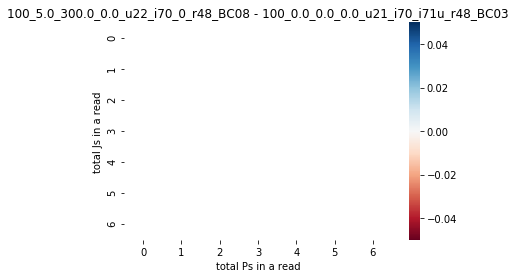

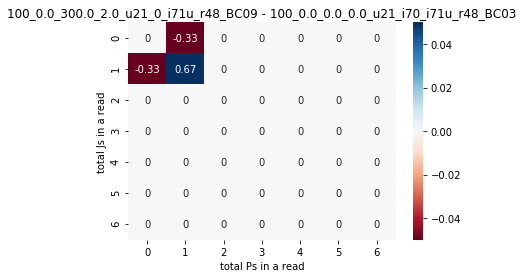

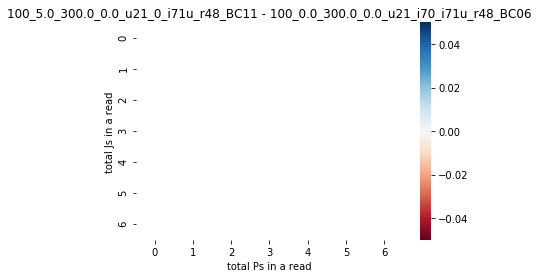

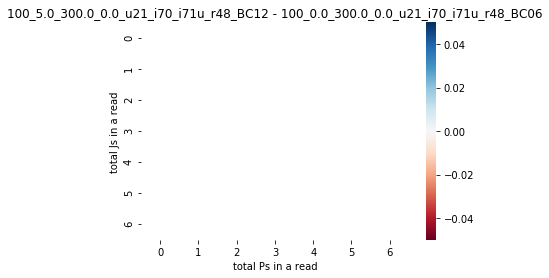

In [8]:
stat = 0

labs = stats_counted[stat][0]
dlist = stats_counted[stat][1]

#crange = [0,.01,6]
crange = [0,.02,1]
sqrange = [-.5,6.5]

diffPlotWrapper("BC03","BC08",experiment_dataframe,dlist,labs=labs)
diffPlotWrapper("BC03","BC09",experiment_dataframe,dlist,labs=labs)

diffPlotWrapper("BC06","BC11",experiment_dataframe,dlist,labs=labs)
diffPlotWrapper("BC06","BC12",experiment_dataframe,dlist,labs=labs)

#makeBCplot1("BC07",crange,sqrange,experiment_dataframe,dlist,labs)
#makeBCplot1("BC08",crange,sqrange,experiment_dataframe,dlist,labs)
#makeBCplot1("BC09",crange,sqrange,experiment_dataframe,dlist,labs)

#makeBCplot1("BC10",crange,sqrange,experiment_dataframe,dlist,labs)
#makeBCplot1("BC11",crange,sqrange,experiment_dataframe,dlist,labs)
#makeBCplot1("BC12",crange,sqrange,experiment_dataframe,dlist,labs)
print("")
#diffPlotWrapper("BC03","BC06",experiment_dataframe,dlist,labs=labs)
#diffPlotWrapper("BC02","BC07",conditions,bcnames,dlist,labs=labs)
#diffPlotWrapper("BC03","BC08",conditions,bcnames,dlist,labs=labs)
#diffPlotWrapper("BC04","BC09",conditions,bcnames,dlist,labs=labs)
#diffPlotWrapper("BC05","BC10",conditions,bcnames,dlist,labs=labs)

#diffPlotWrapper("BC01","BC11",conditions,bcnames,dlist,labs=labs)
#diffPlotWrapper("BC02","BC12",conditions,bcnames,dlist,labs=labs)
#diffPlotWrapper("BC03","BC13",conditions,bcnames,dlist,labs=labs)
#diffPlotWrapper("BC04","BC14",conditions,bcnames,dlist,labs=labs)
#diffPlotWrapper("BC05","BC15",conditions,bcnames,dlist,labs=labs)

#diffPlotWrapper("BC14","BC13",conditions,bcnames,dlist,labs=labs)
#diffPlotWrapper("BC15","BC13",conditions,bcnames,dlist,labs=labs)
#diffPlotWrapper("BC05","BC10",conditions,bcnames,dlist)

#diffPlotWrapper("BC03","BC13",conditions,bcnames,dlist)
#diffPlotWrapper("BC04","BC14",conditions,bcnames,dlist)
#diffPlotWrapper("BC05","BC15",conditions,bcnames,dlist)

#diffPlotWrapper("BC02","BC12",conditions,bcnames,dlist)
#diffPlotWrapper("BC05","BC09",conditions,bcnames,dlist)
#diffPlotWrapper("BC04","BC08",conditions,bcnames,dlist)



In [9]:
plotbcnames = bcnames #[:10]
ticks = np.arange(len(plotbcnames))-.4
secondticks = np.arange(len(plotbcnames))
first_barcode = [first_last[a][0]/float(first_last[a][2]) for a in plotbcnames]
second_barcode = [first_last[a][1]/float(first_last[a][2]) for a in plotbcnames]
plt.bar(ticks,first_barcode,.4)
plt.bar(secondticks,second_barcode,.4)
plt.ylim(0,1)
#plt.legend(["first","last"])
plt.xticks(ticks,conditions,rotation=90)
pass

NameError: name 'bcnames' is not defined

In [ ]:
stretch = True
def recorderplots(experiment_dataframe,letters="PJ",stretch=stretch):
    legendlist = []
    bclist = experiment_dataframe["barcode"]
    for bc in bclist:
        x,y,z = quantifyRecOrder(PJdict[bc],letters=letters,stretch=stretch)
        plt.plot(z)
        legend_unit = condNameBC(bc,experiment_dataframe)
        legendlist += [legend_unit]
    plt.legend(legendlist,bbox_to_anchor=(0.5, -0.05),)

    
plotdf = experiment_dataframe[(experiment_dataframe["SAL"]==100) &\
                              (experiment_dataframe["ink0"]=='g0') &\
                              ((experiment_dataframe["ATC"]>0) |\
                             (experiment_dataframe["CIN"]>0))]
recorderplots(plotdf)
plt.figure()
plotdf = experiment_dataframe[(experiment_dataframe["ink0"]=='g0') &\
                              ((experiment_dataframe["ATC"]==0))]
recorderplots(plotdf)
plt.figure()
plotdf = experiment_dataframe[(experiment_dataframe["SAL"]==100) &\
                              (experiment_dataframe["ink0"]=='g4') &\
                              ((experiment_dataframe["ATC"]>0) |\
                             (experiment_dataframe["CIN"]>0))]
recorderplots(plotdf)
plt.figure()
plotdf = experiment_dataframe[(experiment_dataframe["ink0"]=='g4') &\
                              ((experiment_dataframe["ATC"]==0))]
recorderplots(plotdf)